In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


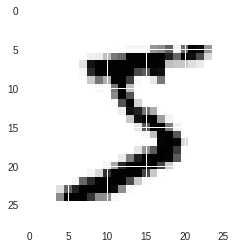

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
model = Sequential()

model.add(Convolution2D(filters = 32, kernel_size = (7, 7), input_shape = (28, 28, 1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Convolution2D(10, 11))


model.add(Flatten())
model.add(Activation('softmax'))

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 22, 22, 32)        1600      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 10)        330       
_________________________________________________________________
activation_2 (Activation)    (None, 22, 22, 10)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 10)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 11, 11, 10)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 1, 10)          12110     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [19]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1)

Epoch 1/20
  576/60000 [..............................] - ETA: 18s - loss: 0.0335 - acc: 0.9931

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


60000/60000 [==============================] - 19s 317us/step - loss: 0.0403 - acc: 0.9870
Epoch 2/20
60000/60000 [==============================] - 19s 319us/step - loss: 0.0390 - acc: 0.9874
Epoch 3/20
 2976/60000 [>.............................] - ETA: 18s - loss: 0.0426 - acc: 0.9839

60000/60000 [==============================] - 19s 319us/step - loss: 0.0373 - acc: 0.9879
Epoch 4/20
60000/60000 [==============================] - 19s 316us/step - loss: 0.0369 - acc: 0.9880
Epoch 5/20
 4352/60000 [=>............................] - ETA: 17s - loss: 0.0313 - acc: 0.9894

60000/60000 [==============================] - 19s 316us/step - loss: 0.0361 - acc: 0.9887
Epoch 6/20
60000/60000 [==============================] - 19s 317us/step - loss: 0.0353 - acc: 0.9880
Epoch 7/20
 5120/60000 [=>............................] - ETA: 17s - loss: 0.0332 - acc: 0.9889

60000/60000 [==============================] - 19s 320us/step - loss: 0.0340 - acc: 0.9886
Epoch 8/20
60000/60000 [==============================] - 19s 319us/step - loss: 0.0319 - acc: 0.9898
Epoch 9/20
 4096/60000 [=>............................] - ETA: 17s - loss: 0.0223 - acc: 0.9924

60000/60000 [==============================] - 19s 320us/step - loss: 0.0328 - acc: 0.9892
Epoch 10/20
60000/60000 [==============================] - 19s 318us/step - loss: 0.0315 - acc: 0.9894
Epoch 11/20
 3680/60000 [>.............................] - ETA: 18s - loss: 0.0276 - acc: 0.9913

60000/60000 [==============================] - 19s 319us/step - loss: 0.0331 - acc: 0.9893
Epoch 12/20
60000/60000 [==============================] - 19s 319us/step - loss: 0.0310 - acc: 0.9899
Epoch 13/20
 3680/60000 [>.............................] - ETA: 17s - loss: 0.0344 - acc: 0.9889

60000/60000 [==============================] - 19s 317us/step - loss: 0.0297 - acc: 0.9902
Epoch 14/20
60000/60000 [==============================] - 19s 317us/step - loss: 0.0293 - acc: 0.9902
Epoch 15/20
 4064/60000 [=>............................] - ETA: 17s - loss: 0.0194 - acc: 0.9929

60000/60000 [==============================] - 19s 317us/step - loss: 0.0292 - acc: 0.9904
Epoch 16/20
60000/60000 [==============================] - 19s 316us/step - loss: 0.0305 - acc: 0.9895
Epoch 17/20
 5056/60000 [=>............................] - ETA: 17s - loss: 0.0256 - acc: 0.9917

60000/60000 [==============================] - 19s 316us/step - loss: 0.0278 - acc: 0.9911
Epoch 18/20
60000/60000 [==============================] - 19s 319us/step - loss: 0.0285 - acc: 0.9903
Epoch 19/20
 4256/60000 [=>............................] - ETA: 17s - loss: 0.0310 - acc: 0.9904

60000/60000 [==============================] - 19s 313us/step - loss: 0.0288 - acc: 0.9907
Epoch 20/20
60000/60000 [==============================] - 19s 313us/step - loss: 0.0271 - acc: 0.9911


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [23]:
print(score)

[0.0516039319561256, 0.987]


In [0]:
y_pred = model.predict(X_test)

In [25]:
print(y_pred[:9])
print(y_test[:9])

[[3.36528868e-20 1.08451012e-20 1.76539027e-13 7.14755810e-10
  5.04641618e-24 9.20470280e-16 3.45472124e-31 1.00000000e+00
  3.73335586e-13 8.35140198e-14]
 [3.91213936e-11 1.36760949e-08 1.00000000e+00 6.95585907e-12
  3.72425704e-18 4.53158646e-19 6.65498279e-09 8.64905508e-18
  6.93421778e-11 1.48724412e-19]
 [9.32676714e-10 9.99952912e-01 5.46925946e-07 6.15498585e-09
  2.29421075e-05 2.48064384e-06 1.26156152e-07 5.04152013e-06
  1.58869298e-05 2.16045581e-08]
 [9.99890804e-01 2.74126497e-17 5.87580296e-08 2.72483458e-09
  5.33313758e-12 1.56821649e-08 1.06440042e-04 1.27604628e-11
  1.90153673e-06 7.14500970e-07]
 [2.83099716e-13 8.85800629e-15 1.77882209e-09 2.94351166e-14
  9.99997735e-01 1.04226405e-14 1.03728389e-11 7.93931240e-11
  4.06931067e-09 2.26694283e-06]
 [4.11913614e-10 9.99896169e-01 5.20152277e-08 7.64801777e-10
  7.80960909e-06 2.17779199e-08 2.93082336e-09 6.16567631e-05
  3.41872110e-05 8.96123495e-08]
 [9.15476085e-27 6.81654645e-18 1.49170337e-15 5.48012778e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

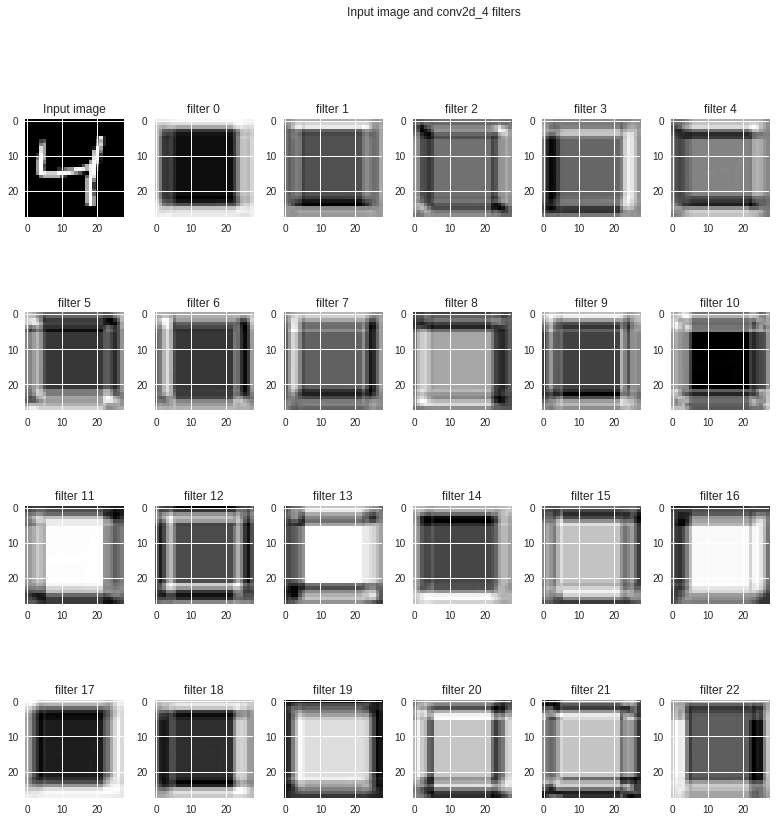

In [28]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_4'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()